In [ ]:
"""
TODO: bivariate analysis of the following

age and sex
sex and class 
age and class 

TODO: multivariate analysis of age, sex and class

TODO: label graphs appropriately

TODO:  remaining columns to analyse = SibSp, Parch, Cabin, Embarked

"""

In [ ]:
"""
this notebook contains exploratory data analysis the the Titanic dataset from Kaggle


the goal is to understand what features affect the survival chances of the passengers


note: we are using only the training data set for analysis, this is only 40.06% of the total number of passengers, 
this is because the test data does not contain the survived status for the passenger so would skew the analysis

"""

In [2]:
import pandas as pd

# load training data
training_data_fp = 'train.csv'
td = pd.read_csv(training_data_fp)

In [ ]:
"""
get some basic stats about the training data using pandas

"""

In [3]:
# number of rows in dataframe
print(len(td.index))

891


In [60]:
# first few rows
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young_adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young_adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [61]:
# pandas descriptive statistics
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
# which columns have NaN values
td.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
AgeGroup       False
dtype: bool

In [ ]:
"""
investigating the 'Survived' dataframe column
"""

In [9]:
# sum of values in Survived column 
# this results in the number of survivors because a value of 1 means passenger survived
# and a value of 0 means the passenger died
print(sum(td['Survived']))

342


In [8]:
# count of each value in column
print(td['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [10]:
# percent of passengers that survived
print(str(sum(td['Survived'])/len(td.index)*100) + "% of passengers survived")

38.38383838383838% of passengers survived


In [11]:
# percent of passengers that passed away
print(str(len(td.loc[td['Survived'] == 0])/len(td.index)*100) + "% of passengers passed away")

61.61616161616161% of passengers passed away


In [ ]:
"""
using matplotlib to describe survival rates
"""

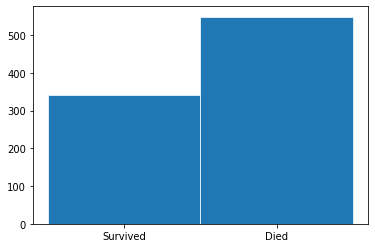

In [4]:
# importing matplotlib for plotting
import matplotlib.pyplot as plt


# plot survived against died
no_surv = int(sum(td['Survived']))
no_died = int(len(td.loc[td['Survived'] == 0]))

x = ['Survived', 'Died']
y = [no_surv, no_died]

fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

<AxesSubplot:xlabel='Survived'>

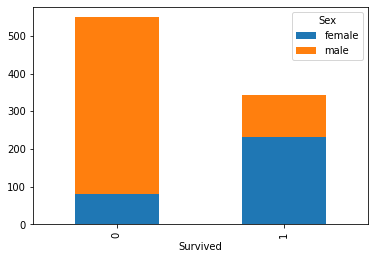

In [7]:
# plot survived against died by sex
td.groupby(['Survived','Sex']).size().unstack().plot(kind='bar',stacked=True)

In [23]:
# breakdown of survival chance by sex 

# total number of men
men_total = td.loc[(td.Sex.isin(['male']))]
print(str(len(men_total)) + " number of men onboard")

# number of men that died
men_died = td.loc[(td.Sex.isin(['male'])) & (td.Survived == 0)]
print(str(len(men_died)) + " men died")

# number of men that survived
men_survived = td.loc[(td.Sex.isin(['male'])) & (td.Survived == 1)]
print(str(len(men_survived)) + " men survived")

# survival chance if male
print(str(len(men_survived)/len(men_total)*100) + "% chance of survival if male")
print("\n")

# total number of women
women_total = td.loc[(td.Sex.isin(['female']))]
print(str(len(women_total)) + " number of women onboard")

# number of women that died
women_died = td.loc[(td.Sex.isin(['female'])) & (td.Survived == 0)]
print(str(len(women_died)) + " women died")

# number of women that survived
women_survived = td.loc[(td.Sex.isin(['female'])) & (td.Survived == 1)]
print(str(len(women_survived)) + " women survived")

# survival chance if female
print(str(len(women_survived)/len(women_total)*100) + "% chance of survival if female")

577 number of men onboard
468 men died
109 men survived
18.890814558058924% chance of survival if male


314 number of women onboard
81 women died
233 women survived
74.20382165605095% chance of survival if female


In [ ]:
"""
from the above statistics we can conclude you have a significantly better chance of survival if you are female

there is a 55.31% increased chance of survival if you are a female passenger compared to a male passenger

however the dataset may be biased as it only contains 891 rows (when there were 2,240 passengers in total)

this should be considered if the ML model trained on this data is not as accurate as expected
(which can be said about any particular feature from an incomplete dataset)

"""

<AxesSubplot:xlabel='Survived'>

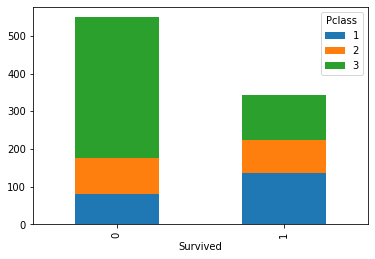

In [9]:
# plot survived against died by passenger class
td.groupby(['Survived','Pclass']).size().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Survived'>

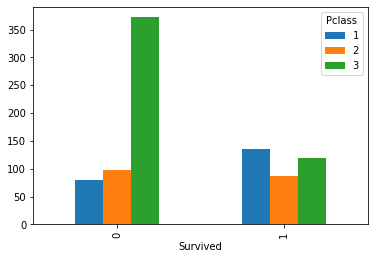

In [24]:
td.groupby(['Survived','Pclass']).size().unstack().plot(kind='bar',stacked=False)

In [26]:
# breakdown of survival chance by passenger class
 
# total number of first class passengers
first_class_total = td.loc[(td.Pclass == 1)]
print(str(len(first_class_total)) + " 1st class passengers onboard")

# total number of first class passengers that died
first_class_died = td.loc[(td.Pclass == 1) & (td.Survived == 0)]
print(str(len(first_class_died)) + " 1st class passengers died")

# total number of first class passengers that survived
first_class_survived = td.loc[(td.Pclass == 1) & (td.Survived == 1)]
print(str(len(first_class_survived)) + " 1st class passengers survived")

# percent chance of survival if first class
print(str(len(first_class_survived)/len(first_class_total)*100) + "% chance of survival if 1st class passenger")
print("\n")

# total number of second class passengers
second_class_total = td.loc[(td.Pclass == 2)]
print(str(len(second_class_total)) + " 2nd class passengers onboard")

# total number of second class passengers that died
second_class_died = td.loc[(td.Pclass == 2) & (td.Survived == 0)]
print(str(len(second_class_died)) + " 2nd class passengers died")

# total number of first class passengers that survived
second_class_survived = td.loc[(td.Pclass == 2) & (td.Survived == 1)]
print(str(len(second_class_survived)) + " 2nd class passengers survived")

# percent chance of survival if second class
print(str(len(second_class_survived)/len(second_class_total)*100) + "% chance of survival if 2nd class passenger")
print("\n")

# total number of third class passengers
third_class_total = td.loc[(td.Pclass == 3)]
print(str(len(third_class_total)) + " 3rd class passengers onboard")

# total number of third class passengers that died 
third_class_died = td.loc[(td.Pclass == 3) & (td.Survived == 0)]
print(str(len(third_class_died)) + " 3rd class passengers died")

# total number of third class passengers that survived
third_class_survived = td.loc[(td.Pclass == 3) & (td.Survived == 1)]
print(str(len(third_class_survived)) + " 3rd class passengers survived")

# percet chance of survival if third class
print(str(len(third_class_survived)/len(third_class_total)*100) + "% chance of survival if 3rd class passenger")

216 1st class passengers onboard
80 1st class passengers died
136 1st class passengers survived
62.96296296296296% chance of survival if 1st class passenger


184 2nd class passengers onboard
97 2nd class passengers died
87 2nd class passengers survived
47.28260869565217% chance of survival if 2nd class passenger


491 3rd class passengers onboard
372 3rd class passengers died
119 3rd class passengers survived
24.236252545824847% chance of survival if 3rd class passenger


In [ ]:
"""
the above statistics show that passenger class is a strong predicator of survival chance

there is a 38.72% increased chance of survival if you are a 1st class passenger compared to a 3rd class passenger

again, bias could be an issue here due to the number of third class passengers vs second and first class
but likely less so than sex as it is a slightly more even distribution of data
"""

<AxesSubplot:xlabel='Survived'>

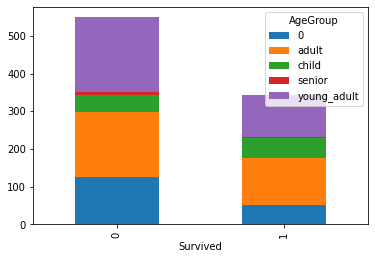

In [30]:
# plot survived against died by age group 
"""
age groups have been categorized as the following:

0-16 : child
17-30 : young adult
31-65 : adult
65+ : senior

worth noting the age column contains NaN values that must be accounted for

depending on the approach we can either drop these, or replace the NaN with the mean/avg 
"""

# first we must bucket the age's into the age groups and add the result to the dataframe as a new column
import numpy as np

# create a list of conditions for age group
age_groups = [
    ((td.Age >= 0) & (td.Age <= 16)),
    ((td.Age >= 17) & (td.Age <= 30)),
    ((td.Age >= 31) & (td.Age <= 65)),
    ((td.Age > 65))
]

# names for the age groups
group_names = ["child", "young_adult", "adult", "senior"]

# use numpy select method to add age group to dataframe
td['AgeGroup'] = np.select(age_groups, group_names)

# check first 5 rows to validate if AgeGroup is applied accurately
td.head()

# plot a graph of Survived by Age group
td.groupby(['Survived','AgeGroup']).size().unstack().plot(kind='bar',stacked=True)




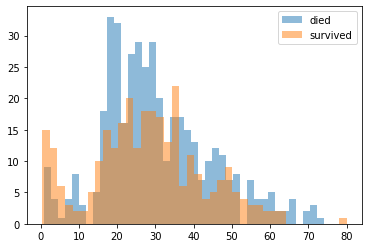

In [8]:
# plot survival chance by age spread
died = td.loc[(td.Survived == 0)]
survived = td.loc[(td.Survived == 1)]
n_bins = 40

x = died["Age"]
y = survived["Age"]

plt.hist(x, n_bins, alpha=0.5, label='died')
plt.hist(y, n_bins, alpha=0.5, label='survived')
plt.legend(loc='upper right')
plt.show()

In [50]:
# breakdown of survival chance by age group 

# total number of children on board
total_children = td.loc[(td.Age >= 0) & (td.Age <= 16)]
print(str(len(total_children)) + " children onboard")

# total number of children that died 
total_children_died = td.loc[(td.Age >= 0) & (td.Age <= 16) & (td.Survived == 0)]
print(str(len(total_children_died)) + " children died")

# total number of children that survived
total_children_survived = td.loc[(td.Age >= 0) & (td.Age <= 16) & (td.Survived == 1)]
print(str(len(total_children_survived)) + " children survived")

# percent chance of survival if child
print(str(len(total_children_survived)/len(total_children)*100) + "% chance of survival if child")
print("\n")


# total number of young adults onboard
total_young_adult = td.loc[(td.Age >= 17) & (td.Age <= 30)]
print(str(len(total_young_adult)) + " young adults onboard")

# total number of young adults died 
total_young_adults_died = td.loc[(td.Age >= 17) & (td.Age <= 30) & (td.Survived == 0)]
print(str(len(total_young_adults_died)) + " young adults died")

# total number of young adults survived
total_young_adults_survived = td.loc[(td.Age >= 17) & (td.Age <= 30) & (td.Survived == 1)]
print(str(len(total_young_adults_survived)) + " young adults survived")

# percent chance of survival if young adult
print(str(len(total_young_adults_survived )/len(total_young_adult)*100) + "% chance of survival if young adult")
print("\n")


# total number of adults onboard
total_adults = td.loc[(td.Age >= 31) & (td.Age <= 65)]
print(str(len(total_adults)) + " adults onboard")

# total number of adults died
total_adults_died = td.loc[(td.Age >= 31) & (td.Age <= 65) & (td.Survived == 0)]
print(str(len(total_adults_died)) + " adults died")

# total number of adults survived
total_adults_survived = td.loc[(td.Age >= 31) & (td.Age <= 65) & (td.Survived == 1)]
print(str(len(total_adults_survived)) + " adults survived")

# percent chance of survival if adult
print(str(len(total_adults_survived)/len(total_adults)*100) + "% chance of survival if adult")
print("\n")


# total number of seniors
total_seniors = td.loc[(td.Age > 65)]
print(str(len(total_seniors)) + " seniors onboard")

# total number of seniors died
total_seniors_died = td.loc[(td.Age > 65) & (td.Survived == 0)]
print(str(len(total_seniors_died)) + " seniors died")

# total number of seniors survived
total_seniors_survived = td.loc[(td.Age > 65) & (td.Survived == 1)]
print(str(len(total_seniors_survived)) + " seniors survived")

# percent chance of survival if senior
print(str(len(total_seniors_survived)/len(total_seniors)*100) + "% chance of survival if senior")


100 children onboard
45 children died
55 children survived
55.00000000000001% chance of survival if child


309 young adults onboard
198 young adults died
111 young adults survived
35.92233009708738% chance of survival if young adult


295 adults onboard
172 adults died
123 adults survived
41.69491525423729% chance of survival if adult


8 seniors onboard
7 seniors died
1 seniors survived
12.5% chance of survival if senior




In [ ]:
"""
the above shows age group has a a reasonably significant impact on survival chance

children have the best chance of survival at 55% and seniors the lowest at 12.5% 
however only 8 seniors were onboard so this could be very biased

suprisignly, young adults had a lesser chance than adult of survival of about 5%
multivariate analysis may show that young adults are typically in a lower passenger
class which may explain the lesser chance of survival compared with adults
"""

512.3292 was the max cost for a single ticket
0.0 was the min cost for a single ticket
32.204207968574636 was the mean cost for a single ticket


<AxesSubplot:ylabel='Density'>

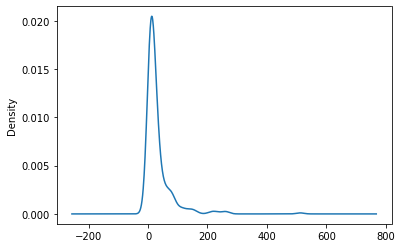

In [14]:
# does the cost of a passenger ticket influence survival chance? 

# first lets check the spread of values for passenger Fare
print(str(td["Fare"].max()) + " was the max cost for a single ticket")
print(str(td["Fare"].min()) + " was the min cost for a single ticket")
print(str(td["Fare"].mean()) + " was the mean cost for a single ticket")

td.Fare.plot(kind='kde')

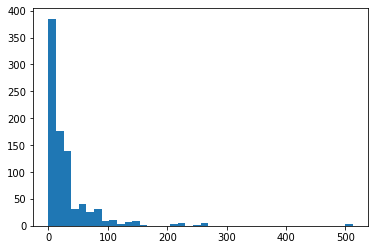

In [4]:
# the above shows the vast majority of fares were below 100 

# spread of Fare Values by number of passengers
x = td["Fare"]
n_bins = 40
plt.hist(x, n_bins)
plt.show()

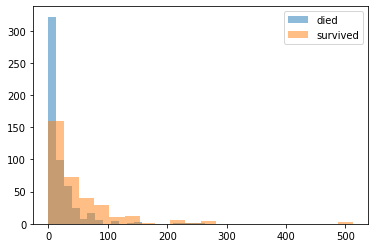

In [5]:
# plot survived status against Fare
died = td.loc[(td.Survived == 0)]
survived = td.loc[(td.Survived == 1)]
n_bins = 20

x = died["Fare"]
y = survived["Fare"]

plt.hist(x, n_bins, alpha=0.5, label='died')
plt.hist(y, n_bins, alpha=0.5, label='survived')
plt.legend(loc='upper right')
plt.show()

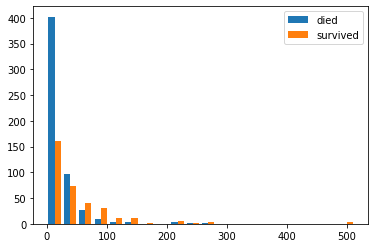

In [35]:
# plot survived status against Fare (alternate visualization)
died = td.loc[(td.Survived == 0)]
survived = td.loc[(td.Survived == 1)]
n_bins = 20

x = died["Fare"]
y = survived["Fare"]

plt.hist([x,y], n_bins, label=['died','survived'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
"""
we can see that those passengers who paid less for their ticket had a less chance of survival ( around <50 )
those who paid more for their ticket had a greater chance of survival ( around > 50 )

however the Fare price seems to be a less distinctive feature of survival chance compared to sex, class and age
next we can bucket the Fare prices and calculate the percent chance of each group to get a clearer picture  
we will use the following ranges for classifying fare group

low cost fare : <25
medium cost fare : >25 <50
high cost fare : >50 <75
very high cost fare : > 75

"""

In [9]:
# breakdown of survival chance by fare group 

# total number of low cost fare on board
total_low_cost_fare = td.loc[(td.Fare >= 0) & (td.Fare <= 25)]
print(str(len(total_low_cost_fare)) + " low cost fare on board")

# total number of low cost fare that died 
total_low_cost_fare_died = td.loc[(td.Fare >= 0) & (td.Fare <= 25) & (td.Survived == 0)]
print(str(len(total_low_cost_fare_died)) + " low cost fare died")

# total number of low cost fare that survived
total_low_cost_fare_survived = td.loc[(td.Fare >= 0) & (td.Fare <= 25) & (td.Survived == 1)]
print(str(len(total_low_cost_fare_survived)) + " low cost fare survived")

# percent chance of survival if low cost fare
print(str(len(total_low_cost_fare_survived)/len(total_low_cost_fare)*100) + "% chance of survival if low cost fare")
print("\n")


# total number of medium cost fare on board
total_medium_cost_fare = td.loc[(td.Fare > 25) & (td.Fare <= 50)]
print(str(len(total_medium_cost_fare)) + " medium cost fare on board")

# total number of medium cost fare that died 
total_medium_cost_fare_died = td.loc[(td.Fare > 25) & (td.Fare <= 50) & (td.Survived == 0)]
print(str(len(total_medium_cost_fare_died)) + " medium cost fare died")

# total number of medium cost fare that survived
total_medium_cost_fare_survived = td.loc[(td.Fare > 25) & (td.Fare <= 50) & (td.Survived == 1)]
print(str(len(total_medium_cost_fare_survived)) + " medium cost fare survived")

# percent chance of survival if medium cost fare
print(str(len(total_medium_cost_fare_survived)/len(total_medium_cost_fare)*100) + "% chance of survival if medium cost fare")
print("\n")


# total number of high cost fare on board
total_high_cost_fare = td.loc[(td.Fare > 50) & (td.Fare <= 75)]
print(str(len(total_high_cost_fare)) + " high cost fare on board")

# total number of high cost fare that died 
total_high_cost_fare_died = td.loc[(td.Fare > 50) & (td.Fare <= 75) & (td.Survived == 0)]
print(str(len(total_high_cost_fare_died)) + " high cost fare died")

# total number of high cost fare that survived
total_high_cost_fare_survived = td.loc[(td.Fare > 50) & (td.Fare <= 75) & (td.Survived == 1)]
print(str(len(total_high_cost_fare_survived)) + " high cost fare survived")

# percent chance of survival if high cost fare
print(str(len(total_high_cost_fare_survived)/len(total_high_cost_fare)*100) + "% chance of survival if high cost fare")
print("\n")


# total number of very high cost fare on board
total_vhigh_cost_fare = td.loc[(td.Fare > 75)]
print(str(len(total_vhigh_cost_fare)) + " high cost fare on board")

# total number of very high cost fare that died 
total_vhigh_cost_fare_died = td.loc[(td.Fare > 75) & (td.Survived == 0)]
print(str(len(total_vhigh_cost_fare_died)) + " high cost fare died")

# total number of very high cost fare that survived
total_vhigh_cost_fare_survived = td.loc[(td.Fare > 75) & (td.Survived == 1)]
print(str(len(total_vhigh_cost_fare_survived)) + " high cost fare survived")

# percent chance of survival if very high cost fare
print(str(len(total_vhigh_cost_fare_survived)/len(total_vhigh_cost_fare)*100) + "% chance of survival if very high cost fare")


557 low cost fare on board
397 low cost fare died
160 low cost fare survived
28.725314183123878% chance of survival if low cost fare


174 medium cost fare on board
101 medium cost fare died
73 medium cost fare survived
41.95402298850575% chance of survival if medium cost fare


63 high cost fare on board
28 high cost fare died
35 high cost fare survived
55.55555555555556% chance of survival if high cost fare


97 high cost fare on board
23 high cost fare died
74 high cost fare survived
76.28865979381443% chance of survival if very high cost fare


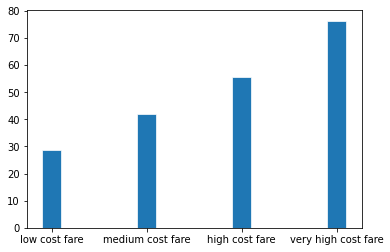

In [22]:
# plot fare price group survival chance (percent vs group)

low_cost_surv_chance = len(total_low_cost_fare_survived)/len(total_low_cost_fare)*100
medium_cost_surv_chance = len(total_medium_cost_fare_survived)/len(total_medium_cost_fare)*100
high_cost_surv_chance = len(total_high_cost_fare_survived)/len(total_high_cost_fare)*100
vhigh_cost_surv_chance = len(total_vhigh_cost_fare_survived)/len(total_vhigh_cost_fare)*100

surv_chances = [low_cost_surv_chance, medium_cost_surv_chance, high_cost_surv_chance, vhigh_cost_surv_chance]
fare_class = ["low cost fare", "medium cost fare", "high cost fare", "very high cost fare"]

fig, ax = plt.subplots()
ax.bar(fare_class, surv_chances, width=0.2, edgecolor="white", linewidth=0.7)

plt.show()

In [ ]:
"""
the above stats are reasonably clear
if you paid for a low cost fare you have around 1 in 4 chance of survival
if you paid for a very high cost fare you have around a 3 in 4 chance of survival
"""

In [23]:
# TODO: remaining columns to analyse
# SibSp, Parch, Cabin, Embarked

8 was the max number for siblings/spouse
0 was the min number for siblings/spouse
0.5230078563411896 was the mean number for siblings/spouse


<AxesSubplot:xlabel='SibSp'>

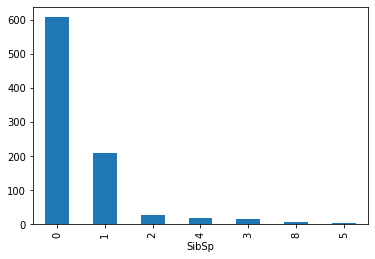

In [28]:
# does having siblings or spouse onboard effect survival chance?

# first lets check the spread of values for siblings/spouse
print(str(td["SibSp"].max()) + " was the max number for siblings/spouse")
print(str(td["SibSp"].min()) + " was the min number for siblings/spouse")
print(str(td["SibSp"].mean()) + " was the mean number for siblings/spouse")

# plot spread of values for number of siblings/spouses
td.value_counts(td['SibSp']).plot.bar()

In [ ]:
"""
the large majority of passengers had no recorded spouse or sibling onboard
"""

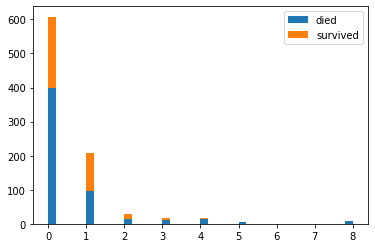

In [34]:
# plot survival chance by number of siblings/spouses
died = td.loc[(td.Survived == 0)]
survived = td.loc[(td.Survived == 1)]
n_bins = 40

x = died["SibSp"]
y = survived["SibSp"]

plt.hist([x,y], n_bins, label=['died','survived'], stacked=True)
plt.legend(loc='upper right')
plt.show()


In [ ]:
"""
from the above plot, it's not particularly obvious if whether having a spouse or 
sibling makes a difference to survival chance

we can inspect the ratio between survived and died for each number of siblings
to have a deeper look however due to the lack of data may be incorrect to infer too much 
"""